Inspired by this [gist](https://gist.github.com/CloudCray/8711607)!

To get data from go to this website:
http://www.census.gov/cgi-bin/geo/shapefiles2010/main

used this: http://www.christianpeccei.com/zipmap/
states: ftp://ftp2.census.gov/geo/tiger/TIGER2010/STATE/2010/

In [1]:
import shapefile
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Find which zipcodes we needd first

In [24]:
df = pd.read_csv('./data/cleaneddataset.csv')

#list of unique  zipcodes
#zipcodes = df['zip'].unique().tolist()

zipval = df['zip'].value_counts()
zipval = zipval[zipval>10] # only more than 10 crimes
#normalized
zipval = zipval/zipval.max()
#list of unique  zipcodes
zipcodes = zipval.index.tolist()

# Plot them

In [25]:
sfile = shapefile.Reader('./tl_2010_04_zcta510/tl_2010_04_zcta510.shp')
shape_recs = sfile.shapeRecords()

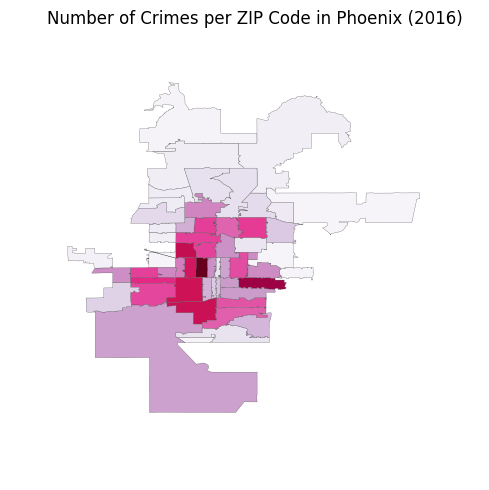

In [34]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

allpatches=[] 
for rec in shape_recs:
    # points that create each zipcode
    points = rec.shape.points
    # metadata
    meta = rec.record
    zipcode=int(meta[1])
    # color map
    cmap = plt.cm.PuRd
    #If only zipcode was part of our database,plot it!
    if zipcode in zipcodes:
        # pick out the right color
        c = cmap(zipval[zipcode]) #np.random.rand(3,1) 
        #create a patch
        patch = patches.Polygon(points,closed=True,facecolor=c,
                                edgecolor=(0.3, 0.3, 0.3, 1.0), linewidth=0.2)
        # collect the patches
        # allpatches.append(patch)
        ax.add_patch(patch)
        
    # if you want to see irrelany zipcodes
    #else:
    #    patch = patches.Polygon(points,True,facecolor='k',edgecolor='white',linewidth=0.2)
    #    ax.add_patch(patch)

#p = PatchCollection(allpatches, match_original=False, alpha=0.3 , linewidth=1)
#ax.add_collection(p)

ax.autoscale()
ax.set_title('Number of Crimes per ZIP Code in Phoenix (2016)')
plt.tight_layout()
plt.axis('off')
plt.savefig("my_map.png")